In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
plt.style.use('seaborn')

## import data

In [34]:
total_results = pd.read_excel('total_results_semi_v4.xlsx', engine='openpyxl', index_col=0, header = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'total_results_semi_v4.xlsx'

In [67]:
total_results_ind = pd.read_excel('total_results_v11.xlsx', engine='openpyxl', index_col=0, header = 0)

## import data t-student

In [3]:
total_results_normal = pd.read_excel('total_results_v11.xlsx', engine='openpyxl', index_col=0, header = 0)

In [5]:
total_results_tstudent_df3 = pd.read_excel('total_results_consistencia_df3.xlsx', engine='openpyxl', index_col=0, header = 0)

total_results_tstudent_df6 = pd.read_excel('total_results_consistencia_df6_v2.xlsx', engine='openpyxl', index_col=0, header = 0)

total_results_tstudent_df9 = pd.read_excel('total_results_consistencia_df9_v2.xlsx', engine='openpyxl', index_col=0, header = 0)

### fig 2

In [4]:
scenarios_fig2 =  total_results[total_results["corDesign"]=="Independence"] 
scenarios_fig2 = scenarios_fig2[(scenarios_fig2.SNR == 2)|(scenarios_fig2.SNR == 0.5)]
scenarios_fig2 = scenarios_fig2[(scenarios_fig2.n == 300)|(scenarios_fig2.n == 100)]
scenarios_fig2 = scenarios_fig2[(scenarios_fig2.s0 != 20)]
scenarios_fig2.index = range(32)

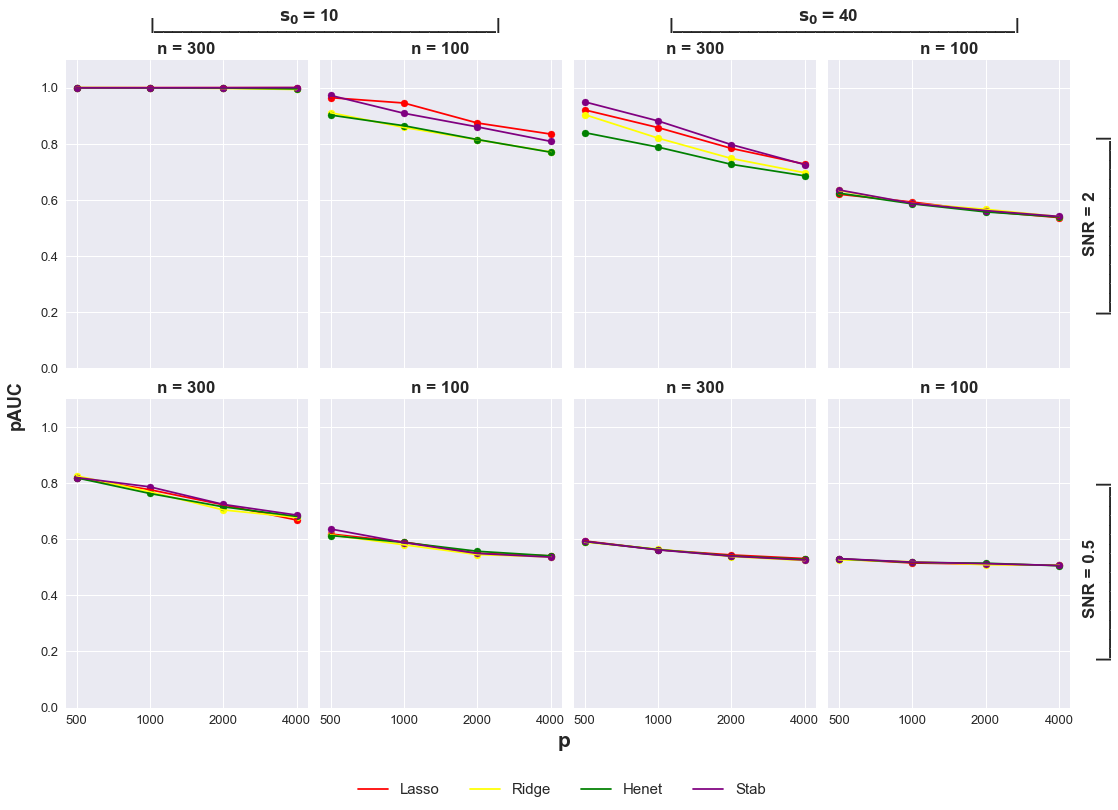

In [8]:
fig,ax = plt.subplots(2,4,sharex=True, sharey=True,figsize = (18,12 ))

for n,s0,SNR,i,j in zip([300,100,300,100,300,100,300,100],[10,10,40,40,10,10,40,40],[2,2,2,2,0.5,0.5,0.5,0.5],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3]):
    part = scenarios_fig2[(scenarios_fig2["n"]==n) & (scenarios_fig2["s0"]==s0) & (scenarios_fig2["SNR"] == SNR)]
##ordenando
    for metodo,cor in zip(["Lasso","Ridge","Henet","Stab"],["red","yellow","green","purple"]):
        ordenado = sorted(part["p"])
        ordem  = np.zeros(4)
            ##### finding the sub_index of the most correlated
        for k in range(4):
            ordem[k] = np.where(part["p"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        pauc_ord= part["pauc_%s"%metodo ]
        pauc_ord = pauc_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(4),pauc_ord, color = cor,label = metodo)
        ax[i,j].scatter(np.arange(4),pauc_ord, color = cor)
    ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks(np.arange(4)) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(ordenado) # change the ticks' names to x
    ax[i,j].set_title('n = %d'%n,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(2.95, -1.3), ncol=4,fontsize = 15)


fig.text(0.51, 0.105, 'p', ha='center', fontweight="bold", size=21)
fig.text(0.08, 0.5, 'pAUC', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.29, 0.95, '$\mathbf{s_0 =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.19, 0.94, '|____________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.69, 0.95, '$\mathbf{s_0= }$40', va='center', fontweight="bold", size=17 )
fig.text(0.59, 0.94, '|____________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.71, 'SNR = 2', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.71, '|__________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.30, 'SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.31, '|__________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
fig.savefig('Fig2.png', dpi=fig.dpi)

plt.show()

## fig 5

In [9]:
scenarios_fig =  total_results[total_results["corDesign"]=="Independence"] 
scenarios_fig = scenarios_fig[(scenarios_fig.SNR == 2)|(scenarios_fig.SNR == 0.5)]
scenarios_fig = scenarios_fig[(scenarios_fig.n == 300)|(scenarios_fig.n == 100)]
scenarios_fig = scenarios_fig[(scenarios_fig.s0 != 20)]
scenarios_fig.index = range(32)

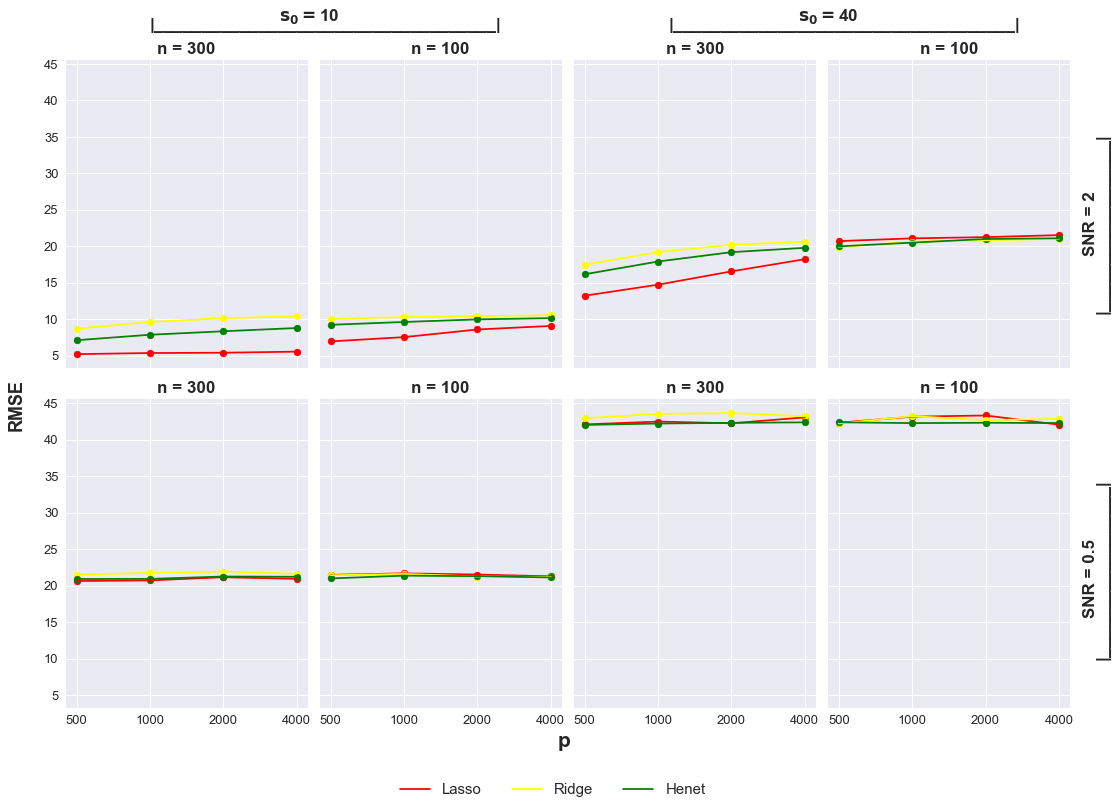

In [11]:


fig,ax = plt.subplots(2,4,sharex=True, sharey=True,figsize = (18,12 ))
score = "RMSE"
for n,s0,SNR,i,j in zip([300,100,300,100,300,100,300,100],[10,10,40,40,10,10,40,40],[2,2,2,2,0.5,0.5,0.5,0.5],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3]):
    part = scenarios_fig[(scenarios_fig["n"]==n) & (scenarios_fig["s0"]==s0) & (scenarios_fig["SNR"] == SNR)]
##ordenando
    for metodo,cor in zip(["Lasso","Ridge","Henet"],["red","yellow","green"]):
        ordenado = sorted(part["p"])
        ordem  = np.zeros(4)
            ##### finding the sub_index of the most correlated
        for k in range(4):
            ordem[k] = np.where(part["p"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["rmse_%s"%metodo ]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(4),score_ord, color = cor,label = metodo)
        ax[i,j].scatter(np.arange(4),score_ord, color = cor)
    #ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks(np.arange(4)) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(ordenado) # change the ticks' names to x
    ax[i,j].set_title('n = %d'%n,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(2.7, -1.3), ncol=4,fontsize = 15)


fig.text(0.51, 0.105, 'p', ha='center', fontweight="bold", size=21)
fig.text(0.08, 0.5, 'RMSE', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.29, 0.95, '$\mathbf{s_0 =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.19, 0.94, '|____________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.69, 0.95, '$\mathbf{s_0= }$40', va='center', fontweight="bold", size=17 )
fig.text(0.59, 0.94, '|____________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.71, 'SNR = 2', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.71, '|__________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.30, 'SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.31, '|__________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
fig.savefig('Fig5.png', dpi=fig.dpi)

plt.show()

## fig 8

In [57]:
scenarios_fig =  total_results[total_results["corDesign"]=="Independence"] 
scenarios_fig = scenarios_fig[(scenarios_fig.SNR == 2)|(scenarios_fig.SNR == 0.5)]
scenarios_fig = scenarios_fig[(scenarios_fig.n == 300)|(scenarios_fig.n == 100)]
scenarios_fig = scenarios_fig[(scenarios_fig.s0 != 20)]
scenarios_fig.index = range(32)

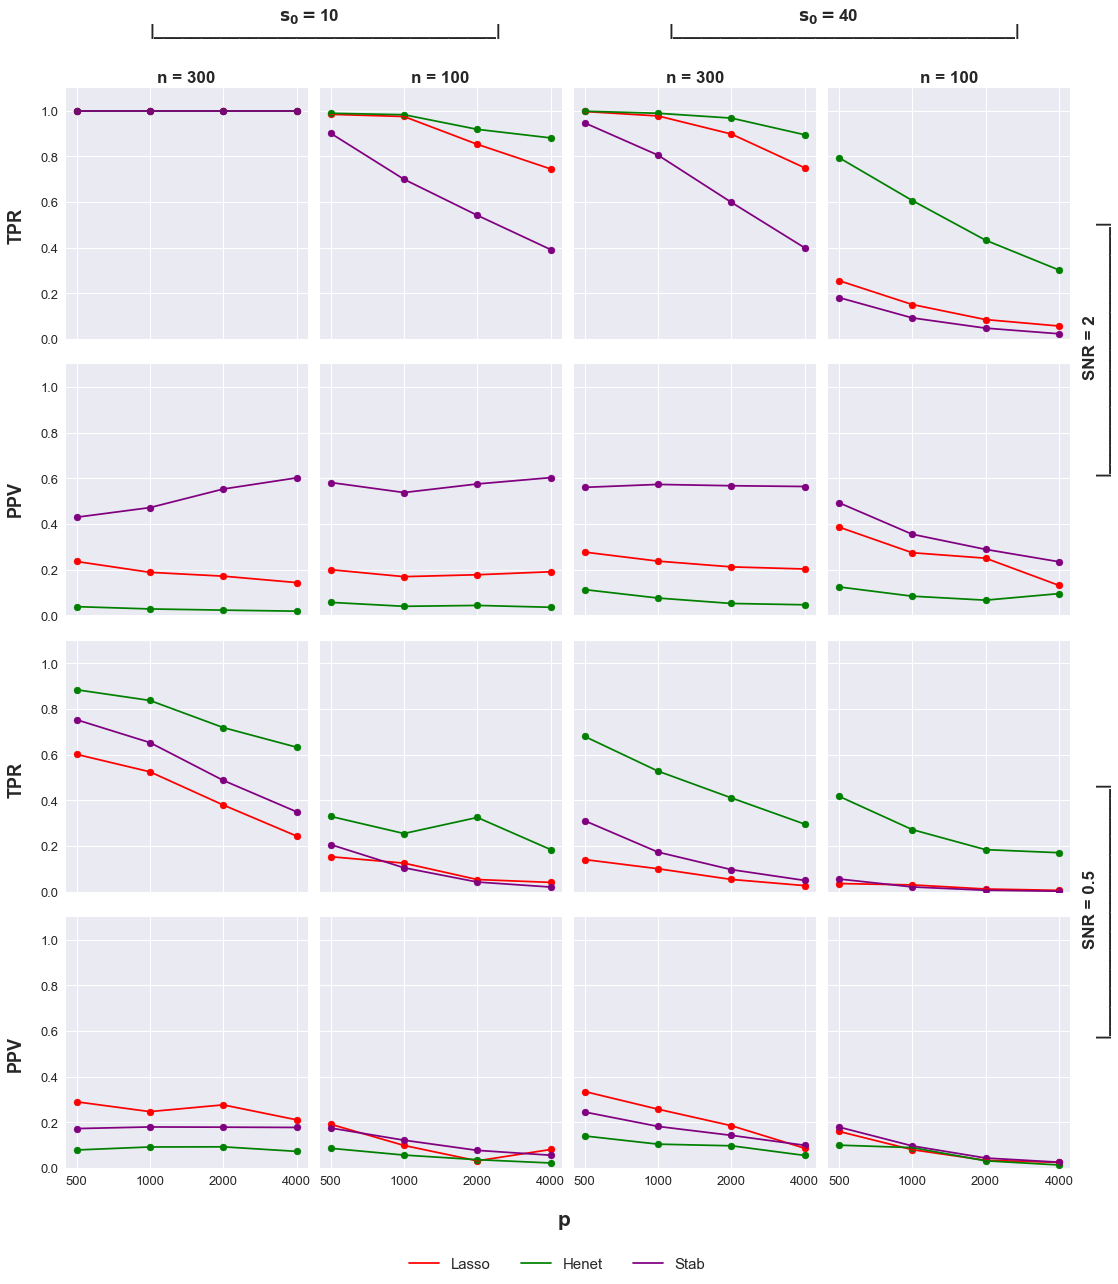

In [12]:
fig,ax = plt.subplots(4,4,sharex=True, sharey=True,figsize = (18,20 ))
#score = "RMSE"
for n,s0,SNR,i,j,score in zip([300,100,300,100,300,100,300,100,300,100,300,100,300,100,300,100],
                        [10,10,40,40,10,10,40,40,10,10,40,40,10,10,40,40],
                        [2,2,2,2,2,2,2,2,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],
                        [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3],[0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3],
                        ["tpr","tpr","tpr","tpr","ppv","ppv","ppv","ppv","tpr","tpr","tpr","tpr","ppv","ppv","ppv","ppv"]):
    
    part = scenarios_fig[(scenarios_fig["n"]==n) & (scenarios_fig["s0"]==s0) & (scenarios_fig["SNR"] == SNR)]
##ordenando
    for metodo,cor in zip(["Lasso","Henet","Stab"],["red","green","purple"]):
        ordenado = sorted(part["p"])
        ordem  = np.zeros(4)
            ##### finding the sub_index of the most correlated
        for k in range(4):
            ordem[k] = np.where(part["p"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["%s_%s"%(score,metodo) ]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(4),score_ord, color = cor,label = metodo)
        ax[i,j].scatter(np.arange(4),score_ord, color = cor)
    ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks(np.arange(4)) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(ordenado) # change the ticks' names to x
    #ax[i,j].set_title('n = %d'%n,fontweight="bold", size=17)

ax[0,0].set_title('n = 300',fontweight="bold", size=17)
ax[0,1].set_title('n = 100',fontweight="bold", size=17)
ax[0,2].set_title('n = 300',fontweight="bold", size=17)
ax[0,3].set_title('n = 100',fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(2.7, -3.6), ncol=4,fontsize = 15)


fig.text(0.51, 0.11, 'p', ha='center', fontweight="bold", size=21)

fig.text(0.08, 0.805, 'TPR', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.08, 0.615, 'PPV', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.08, 0.42, 'TPR', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.08, 0.23, 'PPV', va='center', rotation='vertical', fontweight="bold", size=18 )

fig.text(0.29, 0.95, '$\mathbf{s_0 =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.19, 0.94, '|____________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.69, 0.95, '$\mathbf{s_0= }$40', va='center', fontweight="bold", size=17 )
fig.text(0.59, 0.94, '|____________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.72, 'SNR = 2', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.72, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.33, 'SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.33, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
fig.savefig('Fig8.png', dpi=fig.dpi)

plt.show()

### fig 4 

In [63]:
scenarios_fig =  total_results[total_results["corDesign"]=="Pairwise"] 
scenarios_fig = scenarios_fig[scenarios_fig.SNR == 1]
scenarios_fig = scenarios_fig[scenarios_fig.n == 200]
scenarios_fig = scenarios_fig[(scenarios_fig.s0B == 1)|(scenarios_fig.s0B == 5)]
scenarios_fig = scenarios_fig[(scenarios_fig.pB == 10)|(scenarios_fig.pB == 100)]

scenarios_fig_p1 = scenarios_fig[(scenarios_fig.p == 1000)&(scenarios_fig.s0 == 10)]
scenarios_fig_p2 = scenarios_fig[(scenarios_fig.p == 4000)&(scenarios_fig.s0 == 40)]

scenarios_fig_p1.index = range(12)
scenarios_fig_p2.index = range(12)

In [64]:
###### INDEPENDENCE
scenarios_fig_ind = total_results[total_results["corDesign"]=="Independence"] 
scenarios_fig_ind = scenarios_fig_ind[scenarios_fig_ind.SNR == 1]
scenarios_fig_ind = scenarios_fig_ind[scenarios_fig_ind.n == 200]

scenarios_fig_ind_p1 = scenarios_fig_ind[(scenarios_fig_ind.p == 1000)&(scenarios_fig_ind.s0 == 10)]
scenarios_fig_ind_p2 = scenarios_fig_ind[(scenarios_fig_ind.p == 4000)&(scenarios_fig_ind.s0 == 40)]

scenarios_fig_ind_p1.index = range(1)
scenarios_fig_ind_p2.index = range(1)

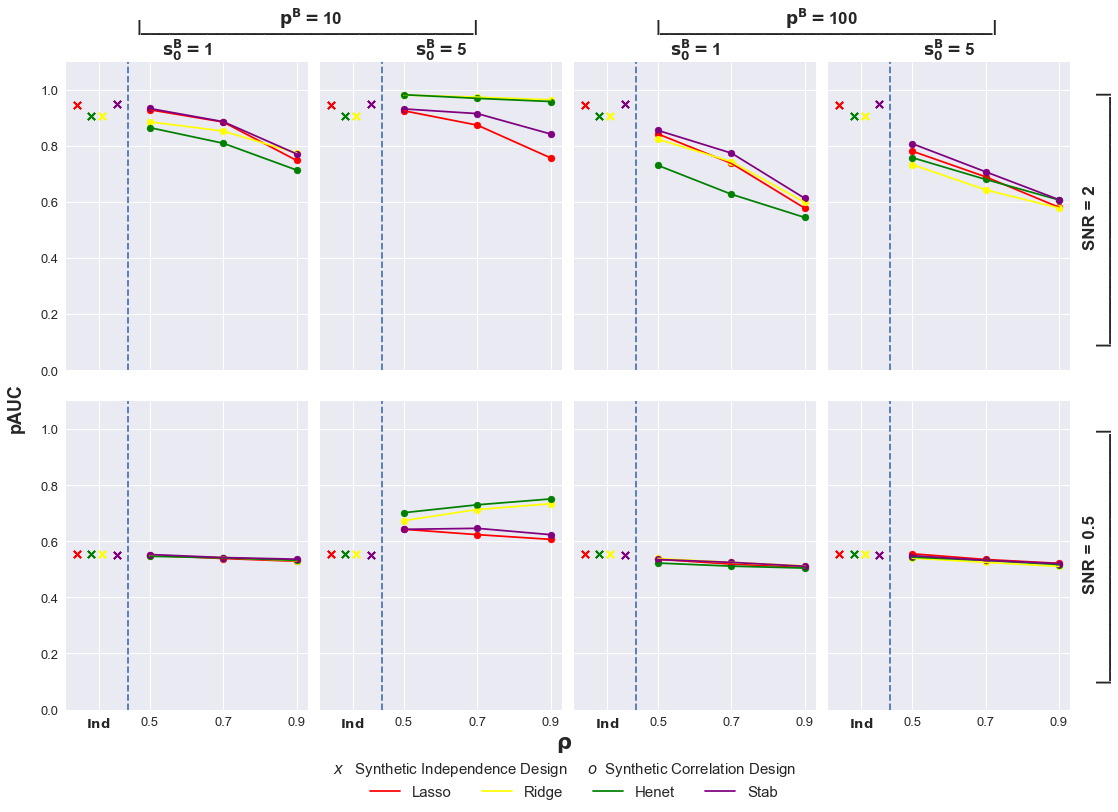

In [65]:
fig,ax = plt.subplots(2,4,sharex=True, sharey=True,figsize = (18,12 ))
score = "pauc"
for pB,s0B,p,s0,i,j in zip([10,10,100,100,10,10,100,100],[1,5,1,5,1,5,1,5],[1000,1000,1000,1000,4000,4000,4000,4000],[10,10,10,10,40,40,40,40],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3]):
    part = scenarios_fig[(scenarios_fig["pB"]==pB) & (scenarios_fig["s0B"]==s0B) & (scenarios_fig["p"] == p) & (scenarios_fig["s0"] == s0)]
    part2 = scenarios_fig_ind[(scenarios_fig_ind["p"] == p) & (scenarios_fig_ind["s0"] == s0)]
##ordenando
    for metodo,cor in zip(["Lasso","Ridge","Henet","Stab"],["red","yellow","green","purple"]):
                            
        ordenado = sorted(part["rho"])
        ordem  = np.zeros(3)
            ##### finding the sub_index of the most correlated
        for k in range(3):
            ordem[k] = np.where(part["rho"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["%s_%s"%(score,metodo) ]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(3),score_ord, color = cor,label = metodo)
        ax[i,j].scatter(np.arange(3),score_ord, color = cor)
        ###independence
        ax[i,j].scatter(-1,part2["%s_Lasso"%score], color = "red", marker = "x")
        ax[i,j].scatter(-0.8,part2["%s_Henet"%score], color = "green", marker = "x")
        ax[i,j].scatter(-0.65,part2["%s_Ridge"%score], color = "yellow", marker = "x")
        ax[i,j].scatter(-0.45,part2["%s_Stab"%score], color = "purple", marker = "x")
        
    ax[i,j].axvline(x=-0.3, ymin=0, ymax=1,ls = '--')
    ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks([-0.7,0,1,2]) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(list(['$\mathbf{Ind}$'])+list(sorted(part["rho"]))) # change the ticks' names to x
    #ax[i,j].set_title('s0B = %d'%s0B,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(3, -1.3), ncol=4,fontsize = 15)
ax[0,0].set_title('$\mathbf{s_0^B= }$1',fontweight="bold", size=17)
ax[0,1].set_title('$\mathbf{s_0^B= }$5',fontweight="bold", size=17)
ax[0,2].set_title('$\mathbf{s_0^B= }$1',fontweight="bold", size=17)
ax[0,3].set_title('$\mathbf{s_0^B= }$5',fontweight="bold", size=17)

fig.text(0.51, 0.105, '$\mathbf{\u03C1}$', ha='center', fontweight="bold", size=21)
fig.text(0.51, 0.0765, '$x$   Synthetic Independence Design     $\u03BF$  Synthetic Correlation Design', ha='center', size=15)
fig.text(0.08, 0.5, 'pAUC', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.29, 0.95, '$\mathbf{p^B =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.18, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.68, 0.95, '$\mathbf{p^B =}$100', va='center', fontweight="bold", size=17 )
fig.text(0.58, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.72, 'SNR = 2', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.72, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.33, 'SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.33, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
fig.savefig('Fig4.png', dpi=fig.dpi)

plt.show()

### fig 7

In [78]:
scenarios_fig =  total_results[total_results["corDesign"]=="Pairwise"] 
scenarios_fig = scenarios_fig[scenarios_fig.SNR == 1]
scenarios_fig = scenarios_fig[scenarios_fig.n == 200]
scenarios_fig = scenarios_fig[(scenarios_fig.s0B == 1)|(scenarios_fig.s0B == 5)]
scenarios_fig = scenarios_fig[(scenarios_fig.pB == 10)|(scenarios_fig.pB == 100)]

scenarios_fig_p1 = scenarios_fig[(scenarios_fig.p == 1000)&(scenarios_fig.s0 == 10)]
scenarios_fig_p2 = scenarios_fig[(scenarios_fig.p == 4000)&(scenarios_fig.s0 == 40)]

scenarios_fig_p1.index = range(12)
scenarios_fig_p2.index = range(12)

In [79]:
###### INDEPENDENCE
scenarios_fig_ind = total_results[total_results["corDesign"]=="Independence"] 
scenarios_fig_ind = scenarios_fig_ind[scenarios_fig_ind.SNR == 1]
scenarios_fig_ind = scenarios_fig_ind[scenarios_fig_ind.n == 200]

scenarios_fig_ind_p1 = scenarios_fig_ind[(scenarios_fig_ind.p == 1000)&(scenarios_fig_ind.s0 == 10)]
scenarios_fig_ind_p2 = scenarios_fig_ind[(scenarios_fig_ind.p == 4000)&(scenarios_fig_ind.s0 == 40)]

scenarios_fig_ind_p1.index = range(1)
scenarios_fig_ind_p2.index = range(1)

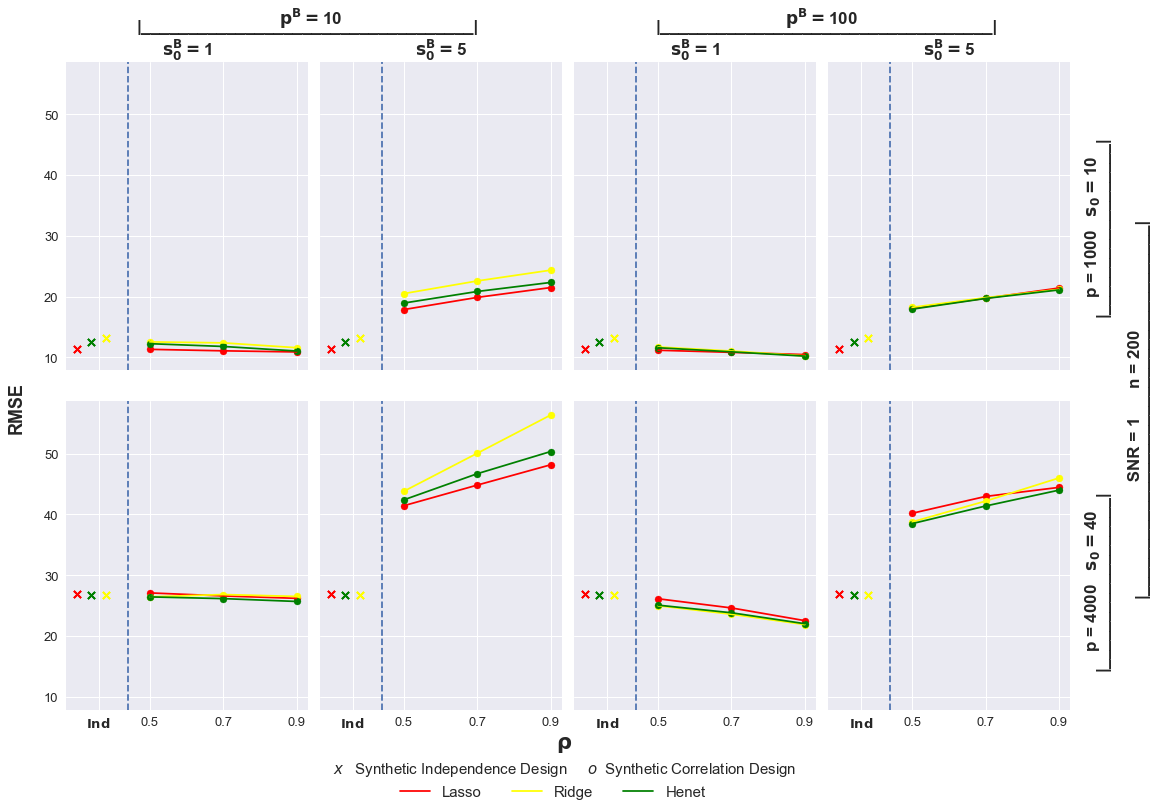

In [84]:
fig,ax = plt.subplots(2,4,sharex=True, sharey=True,figsize = (18,12 ))
score = "rmse"
for pB,s0B,p,s0,i,j in zip([10,10,100,100,10,10,100,100],[1,5,1,5,1,5,1,5],[1000,1000,1000,1000,4000,4000,4000,4000],[10,10,10,10,40,40,40,40],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3]):
    part = scenarios_fig[(scenarios_fig["pB"]==pB) & (scenarios_fig["s0B"]==s0B) & (scenarios_fig["p"] == p) & (scenarios_fig["s0"] == s0)]
    part2 = scenarios_fig_ind[(scenarios_fig_ind["p"] == p) & (scenarios_fig_ind["s0"] == s0)]
##ordenando
    for metodo,cor in zip(["Lasso","Ridge","Henet"],["red","yellow","green"]):
                            
        ordenado = sorted(part["rho"])
        ordem  = np.zeros(3)
            ##### finding the sub_index of the most correlated
        for k in range(3):
            ordem[k] = np.where(part["rho"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["%s_%s"%(score,metodo) ]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(3),score_ord, color = cor,label = metodo)
        ax[i,j].scatter(np.arange(3),score_ord, color = cor)
        ###independence
        ax[i,j].scatter(-1,part2["%s_Lasso"%score], color = "red", marker = "x")
        ax[i,j].scatter(-0.8,part2["%s_Henet"%score], color = "green", marker = "x")
        ax[i,j].scatter(-0.6,part2["%s_Ridge"%score], color = "yellow", marker = "x")
        
    ax[i,j].axvline(x=-0.3, ymin=0, ymax=1,ls = '--')
    #ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks([-0.7,0,1,2]) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(list(['$\mathbf{Ind}$'])+list(sorted(part["rho"]))) # change the ticks' names to x
    #ax[i,j].set_title('s0B = %d'%s0B,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(2.7, -1.3), ncol=4,fontsize = 15)
ax[0,0].set_title('$\mathbf{s_0^B= }$1',fontweight="bold", size=17)
ax[0,1].set_title('$\mathbf{s_0^B= }$5',fontweight="bold", size=17)
ax[0,2].set_title('$\mathbf{s_0^B= }$1',fontweight="bold", size=17)
ax[0,3].set_title('$\mathbf{s_0^B= }$5',fontweight="bold", size=17)

fig.text(0.51, 0.105, '$\mathbf{\u03C1}$', ha='center', fontweight="bold", size=21)
fig.text(0.51, 0.0765, '$x$   Synthetic Independence Design     $\u03BF$  Synthetic Correlation Design', ha='center', size=15)
fig.text(0.08, 0.5, 'RMSE', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.29, 0.95, '$\mathbf{p^B =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.18, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.68, 0.95, '$\mathbf{p^B =}$100', va='center', fontweight="bold", size=17 )
fig.text(0.58, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.71, 'p = 1000   $\mathbf{s_0 =}$10 ', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.71, '|__________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.30, 'p = 4000   $\mathbf{s_0 =}$40 ', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.30, '|__________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.95, 0.5, '|_______________________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.945, 0.5, ' SNR = 1      n = 200', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
fig.savefig('Fig7.png', dpi=fig.dpi)

plt.show()

## fig 3

In [17]:
scenarios_fig =  total_results[total_results["p"]==2000] 
scenarios_fig = scenarios_fig[(scenarios_fig.SNR == 2)|(scenarios_fig.SNR == 0.5)]
scenarios_fig = scenarios_fig[(scenarios_fig.n == 100)|(scenarios_fig.n == 300)]
scenarios_fig = scenarios_fig[(scenarios_fig.s0 == 10)|(scenarios_fig.s0 == 40)]
scenarios_fig = scenarios_fig[(scenarios_fig.s0B == 1)|(scenarios_fig.s0B == 2)|(scenarios_fig.s0B == 5)]

scenarios_fig.index = range(24)


In [25]:
#######INDEPENDENCE
scenarios_fig_ind = total_results_ind[total_results_ind["corDesign"]=="Independence"] 
scenarios_fig_ind = scenarios_fig_ind[(scenarios_fig_ind.p == 2000)]
scenarios_fig_ind = scenarios_fig_ind[(scenarios_fig_ind.SNR == 2)|(scenarios_fig_ind.SNR == 0.5)]
scenarios_fig_ind = scenarios_fig_ind[(scenarios_fig_ind.n == 100)|(scenarios_fig_ind.n == 300)]
scenarios_fig_ind = scenarios_fig_ind[(scenarios_fig_ind.s0 == 10)|(scenarios_fig_ind.s0 == 40)]
scenarios_fig_ind.index = range(8)



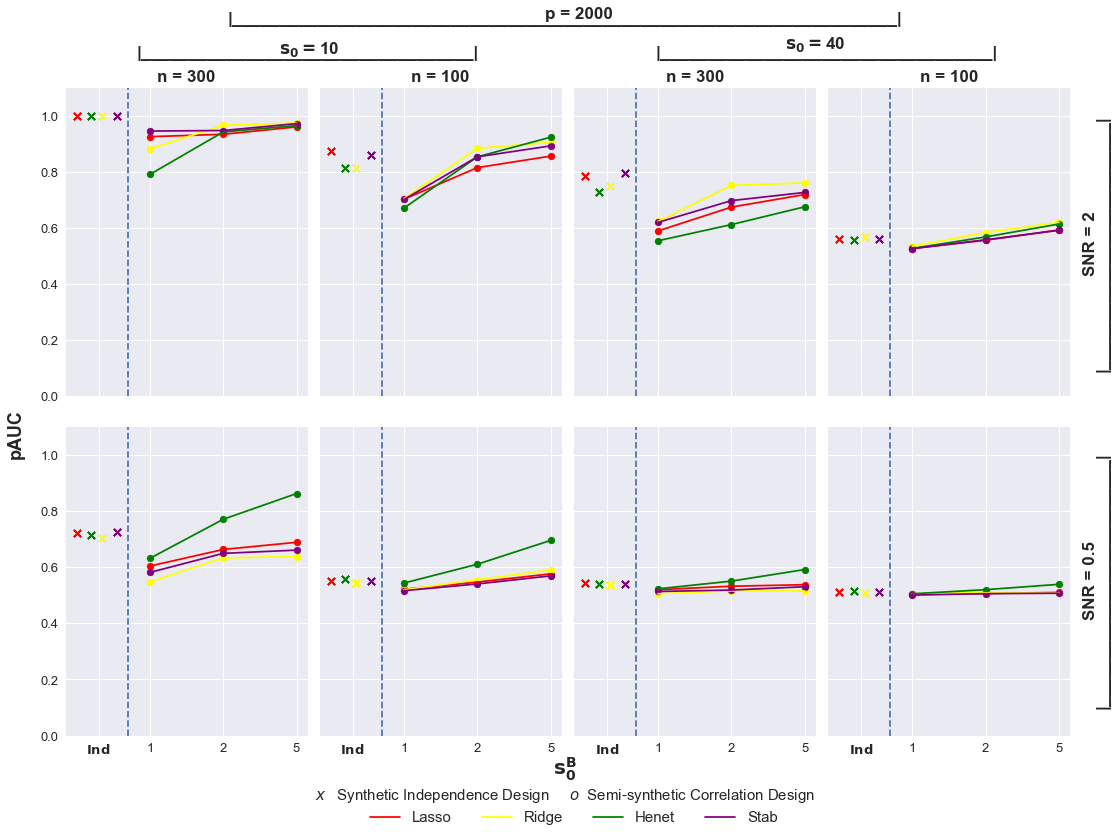

In [82]:
fig,ax = plt.subplots(2,4,sharex=True, sharey=True,figsize = (18,12 ))
score = "pauc"
for SNR,n,s0,i,j in zip([2,2,2,2,0.5,0.5,0.5,0.5],[300,100,300,100,300,100,300,100],[10,10,40,40,10,10,40,40],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3]):
    part = scenarios_fig[(scenarios_fig["SNR"]==SNR) & (scenarios_fig["n"]==n) & (scenarios_fig["s0"] == s0)]
    part2 = scenarios_fig_ind[(scenarios_fig_ind["SNR"] == SNR) & (scenarios_fig_ind["s0"] == s0) & (scenarios_fig_ind["n"] == n)]
##ordenando
    for metodo,cor in zip(["Lasso","Ridge","Henet","Stab"],["red","yellow","green","purple"]):
                            
        ordenado = sorted(part["s0B"])
        ordem  = np.zeros(3)
            ##### finding the sub_index of the most correlated
        for k in range(3):
            ordem[k] = np.where(part["s0B"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["%s_%s"%(score,metodo) ]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(3),score_ord, color = cor,label = metodo)
        ax[i,j].scatter(np.arange(3),score_ord, color = cor)
        ###independence
        ax[i,j].scatter(-1,part2["%s_Lasso"%score], color = "red", marker = "x")
        ax[i,j].scatter(-0.8,part2["%s_Henet"%score], color = "green", marker = "x")
        ax[i,j].scatter(-0.65,part2["%s_Ridge"%score], color = "yellow", marker = "x")
        ax[i,j].scatter(-0.45,part2["%s_Stab"%score], color = "purple", marker = "x")
        
    ax[i,j].axvline(x=-0.3, ymin=0, ymax=1,ls = '--')
    ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks([-0.7,0,1,2]) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(list(['$\mathbf{Ind}$'])+list(sorted(part["s0B"]))) # change the ticks' names to x
    #ax[i,j].set_title('s0B = %d'%s0B,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(3, -1.3), ncol=4,fontsize = 15)
ax[0,0].set_title('n = 300',fontweight="bold", size=17)
ax[0,1].set_title('n = 100',fontweight="bold", size=17)
ax[0,2].set_title('n = 300',fontweight="bold", size=17)
ax[0,3].set_title('n = 100',fontweight="bold", size=17)

fig.text(0.51, 0.105, '$\mathbf{s_0^B}$', ha='center', fontweight="bold", size=20)
fig.text(0.51, 0.0765, '$x$   Synthetic Independence Design     $\u03BF$  Semi-synthetic Correlation Design', ha='center', size=15)
fig.text(0.08, 0.5, 'pAUC', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.495, 0.985, 'p = 2000', va='center', fontweight="bold", size=17 )
fig.text(0.25, 0.98, '|______________________________________________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.29, 0.945, '$\mathbf{s_0 =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.18, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.68, 0.95, '$\mathbf{s_0 =}$40', va='center', fontweight="bold", size=17 )
fig.text(0.58, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.72, 'SNR = 2', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.72, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.33, 'SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.33, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
fig.savefig('Fig3.png', dpi=fig.dpi)

plt.show()

## fig 6 

In [76]:
scenarios_fig =  total_results[total_results["p"]==2000] 
scenarios_fig = scenarios_fig[(scenarios_fig.SNR == 2)|(scenarios_fig.SNR == 0.5)]
scenarios_fig = scenarios_fig[(scenarios_fig.n == 100)|(scenarios_fig.n == 300)]
scenarios_fig = scenarios_fig[(scenarios_fig.s0 == 10)|(scenarios_fig.s0 == 40)]
scenarios_fig = scenarios_fig[(scenarios_fig.s0B == 1)|(scenarios_fig.s0B == 2)|(scenarios_fig.s0B == 5)]

scenarios_fig.index = range(24)

In [77]:
#######INDEPENDENCE
scenarios_fig_ind = total_results_ind[total_results_ind["corDesign"]=="Independence"] 
scenarios_fig_ind = scenarios_fig_ind[(scenarios_fig_ind.p == 2000)]
scenarios_fig_ind = scenarios_fig_ind[(scenarios_fig_ind.SNR == 2)|(scenarios_fig_ind.SNR == 0.5)]
scenarios_fig_ind = scenarios_fig_ind[(scenarios_fig_ind.n == 100)|(scenarios_fig_ind.n == 300)]
scenarios_fig_ind = scenarios_fig_ind[(scenarios_fig_ind.s0 == 10)|(scenarios_fig_ind.s0 == 40)]
scenarios_fig_ind.index = range(8)


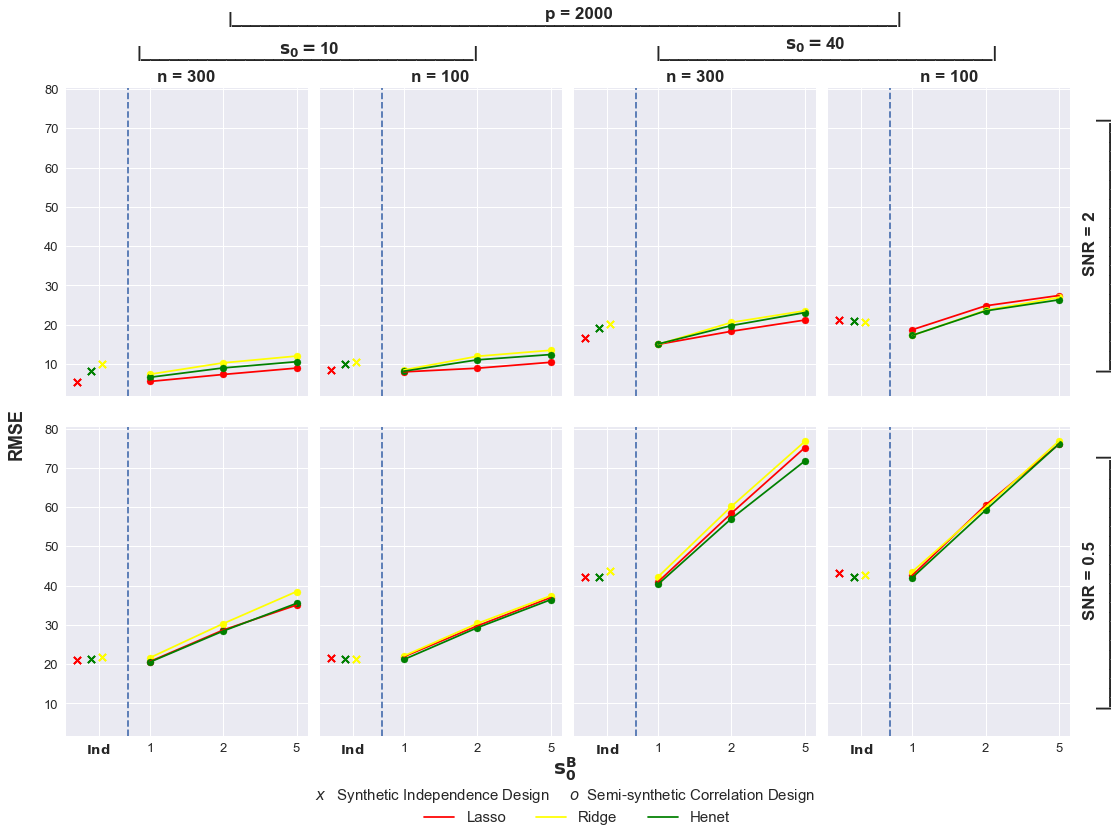

In [88]:
fig,ax = plt.subplots(2,4,sharex=True, sharey=True,figsize = (18,12 ))
score = "rmse"
for SNR,n,s0,i,j in zip([2,2,2,2,0.5,0.5,0.5,0.5],[300,100,300,100,300,100,300,100],[10,10,40,40,10,10,40,40],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3]):
    part = scenarios_fig[(scenarios_fig["SNR"]==SNR) & (scenarios_fig["n"]==n) & (scenarios_fig["s0"] == s0)]
    part2 = scenarios_fig_ind[(scenarios_fig_ind["SNR"] == SNR) & (scenarios_fig_ind["s0"] == s0) & (scenarios_fig_ind["n"] == n)]
##ordenando
    for metodo,cor in zip(["Lasso","Ridge","Henet"],["red","yellow","green"]):
                            
        ordenado = sorted(part["s0B"])
        ordem  = np.zeros(3)
            ##### finding the sub_index of the most correlated
        for k in range(3):
            ordem[k] = np.where(part["s0B"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["%s_%s"%(score,metodo) ]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(3),score_ord, color = cor,label = metodo)
        ax[i,j].scatter(np.arange(3),score_ord, color = cor)
        ###independence
        ax[i,j].scatter(-1,part2["%s_Lasso"%score], color = "red", marker = "x")
        ax[i,j].scatter(-0.8,part2["%s_Henet"%score], color = "green", marker = "x")
        ax[i,j].scatter(-0.65,part2["%s_Ridge"%score], color = "yellow", marker = "x")
        
    ax[i,j].axvline(x=-0.3, ymin=0, ymax=1,ls = '--')
    #ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks([-0.7,0,1,2]) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(list(['$\mathbf{Ind}$'])+list(sorted(part["s0B"]))) # change the ticks' names to x
    #ax[i,j].set_title('s0B = %d'%s0B,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(2.8, -1.3), ncol=4,fontsize = 15)
ax[0,0].set_title('n = 300',fontweight="bold", size=17)
ax[0,1].set_title('n = 100',fontweight="bold", size=17)
ax[0,2].set_title('n = 300',fontweight="bold", size=17)
ax[0,3].set_title('n = 100',fontweight="bold", size=17)

fig.text(0.51, 0.105, '$\mathbf{s_0^B}$', ha='center', fontweight="bold", size=20)
fig.text(0.51, 0.0765, '$x$   Synthetic Independence Design     $\u03BF$  Semi-synthetic Correlation Design', ha='center', size=15)
fig.text(0.08, 0.5, 'RMSE', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.495, 0.985, 'p = 2000', va='center', fontweight="bold", size=17 )
fig.text(0.25, 0.98, '|______________________________________________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.29, 0.945, '$\mathbf{s_0 =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.18, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.68, 0.95, '$\mathbf{s_0 =}$40', va='center', fontweight="bold", size=17 )
fig.text(0.58, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.72, 'SNR = 2', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.72, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.33, 'SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.33, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
fig.savefig('Fig6.png', dpi=fig.dpi)

plt.show()

# fig 3 t-student

In [7]:
########### semi- tstudent
scenarios_fig_tstudent =  total_results_tstudent[total_results_tstudent["p"]==2000] 
scenarios_fig_tstudent= scenarios_fig_tstudent[(scenarios_fig_tstudent.SNR == 2)|(scenarios_fig_tstudent.SNR == 0.5)]
scenarios_fig_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent.n == 100)|(scenarios_fig_tstudent.n == 300)]
scenarios_fig_tstudent= scenarios_fig_tstudent[(scenarios_fig_tstudent.s0 == 10)|(scenarios_fig_tstudent.s0 == 40)]
scenarios_fig_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent.s0B == 1)|(scenarios_fig_tstudent.s0B == 2)|(scenarios_fig_tstudent.s0B == 5)]

scenarios_fig_tstudent.index = range(24)

In [8]:
######### semi- normal
scenarios_fig_normal =  total_results_normal[total_results_normal["p"]==2000] 
scenarios_fig_normal= scenarios_fig_normal[(scenarios_fig_normal.SNR == 2)|(scenarios_fig_normal.SNR == 0.5)]
scenarios_fig_normal = scenarios_fig_normal[(scenarios_fig_normal.n == 100)|(scenarios_fig_normal.n == 300)]
scenarios_fig_normal= scenarios_fig_normal[(scenarios_fig_normal.s0 == 10)|(scenarios_fig_normal.s0 == 40)]
scenarios_fig_normal = scenarios_fig_normal[(scenarios_fig_normal.s0B == 1)|(scenarios_fig_normal.s0B == 2)|(scenarios_fig_normal.s0B == 5)]

scenarios_fig_normal.index = range(24)

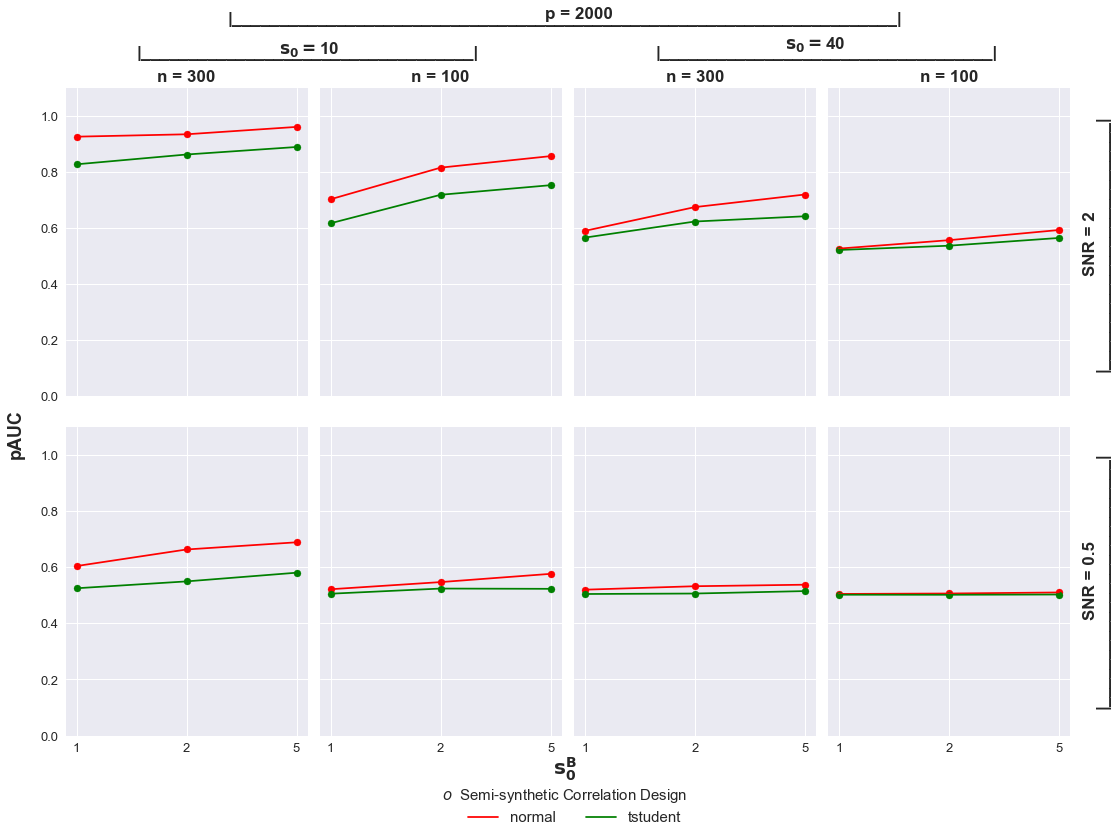

In [9]:
fig,ax = plt.subplots(2,4,sharex=True, sharey=True,figsize = (18,12 ))
score = "pauc"
for SNR,n,s0,i,j in zip([2,2,2,2,0.5,0.5,0.5,0.5],[300,100,300,100,300,100,300,100],[10,10,40,40,10,10,40,40],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3]):
    part_normal = scenarios_fig_normal[(scenarios_fig_normal["n"]==n) & (scenarios_fig_normal["s0"]==s0) & (scenarios_fig_normal["SNR"] == SNR)]
    part_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent["n"]==n) & (scenarios_fig_tstudent["s0"]==s0) & (scenarios_fig_tstudent["SNR"] == SNR)]
    part_dict = {"tstudent":part_tstudent, "normal": part_normal}
##ordenando
    for dado,cor in zip(["normal","tstudent"],["red","green"]):
        
        part  = part_dict[dado]
        ordenado = sorted(part["s0B"])
        ordem  = np.zeros(3)
            ##### finding the sub_index of the most correlated
        for k in range(3):
            ordem[k] = np.where(part["s0B"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["%s_Lasso"%(score)]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(3),score_ord, color = cor,label = dado)
        ax[i,j].scatter(np.arange(3),score_ord, color = cor)
        
    ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks([0,1,2]) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(list(sorted(part["s0B"]))) # change the ticks' names to x
    #ax[i,j].set_title('s0B = %d'%s0B,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(2.6, -1.3), ncol=4,fontsize = 15)
ax[0,0].set_title('n = 300',fontweight="bold", size=17)
ax[0,1].set_title('n = 100',fontweight="bold", size=17)
ax[0,2].set_title('n = 300',fontweight="bold", size=17)
ax[0,3].set_title('n = 100',fontweight="bold", size=17)

fig.text(0.51, 0.105, '$\mathbf{s_0^B}$', ha='center', fontweight="bold", size=20)
fig.text(0.51, 0.0765, '$\u03BF$  Semi-synthetic Correlation Design', ha='center', size=15)
fig.text(0.08, 0.5, 'pAUC', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.495, 0.985, 'p = 2000', va='center', fontweight="bold", size=17 )
fig.text(0.25, 0.98, '|______________________________________________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.29, 0.945, '$\mathbf{s_0 =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.18, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.68, 0.95, '$\mathbf{s_0 =}$40', va='center', fontweight="bold", size=17 )
fig.text(0.58, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.72, 'SNR = 2', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.72, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.33, 'SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.33, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
#fig.savefig('Fig3-consistencia.png', dpi=fig.dpi)

plt.show()

# fig 6 t-student

In [10]:
########### semi- tstudent
scenarios_fig_tstudent =  total_results_tstudent[total_results_tstudent["p"]==2000] 
scenarios_fig_tstudent= scenarios_fig_tstudent[(scenarios_fig_tstudent.SNR == 2)|(scenarios_fig_tstudent.SNR == 0.5)]
scenarios_fig_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent.n == 100)|(scenarios_fig_tstudent.n == 300)]
scenarios_fig_tstudent= scenarios_fig_tstudent[(scenarios_fig_tstudent.s0 == 10)|(scenarios_fig_tstudent.s0 == 40)]
scenarios_fig_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent.s0B == 1)|(scenarios_fig_tstudent.s0B == 2)|(scenarios_fig_tstudent.s0B == 5)]

scenarios_fig_tstudent.index = range(24)

In [11]:
######### semi- normal
scenarios_fig_normal =  total_results_normal[total_results_normal["p"]==2000] 
scenarios_fig_normal= scenarios_fig_normal[(scenarios_fig_normal.SNR == 2)|(scenarios_fig_normal.SNR == 0.5)]
scenarios_fig_normal = scenarios_fig_normal[(scenarios_fig_normal.n == 100)|(scenarios_fig_normal.n == 300)]
scenarios_fig_normal= scenarios_fig_normal[(scenarios_fig_normal.s0 == 10)|(scenarios_fig_normal.s0 == 40)]
scenarios_fig_normal = scenarios_fig_normal[(scenarios_fig_normal.s0B == 1)|(scenarios_fig_normal.s0B == 2)|(scenarios_fig_normal.s0B == 5)]

scenarios_fig_normal.index = range(24)

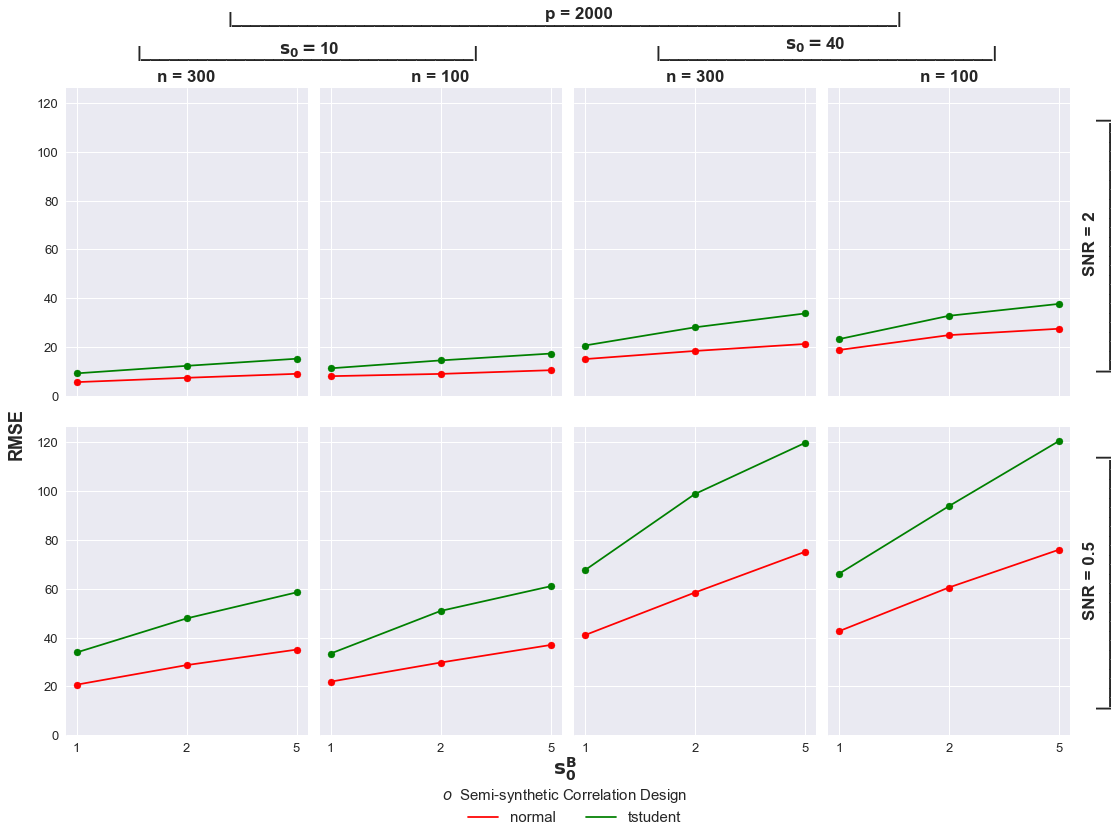

In [13]:
fig,ax = plt.subplots(2,4,sharex=True, sharey=True,figsize = (18,12 ))
score = "rmse"
for SNR,n,s0,i,j in zip([2,2,2,2,0.5,0.5,0.5,0.5],[300,100,300,100,300,100,300,100],[10,10,40,40,10,10,40,40],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3]):
    part_normal = scenarios_fig_normal[(scenarios_fig_normal["n"]==n) & (scenarios_fig_normal["s0"]==s0) & (scenarios_fig_normal["SNR"] == SNR)]
    part_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent["n"]==n) & (scenarios_fig_tstudent["s0"]==s0) & (scenarios_fig_tstudent["SNR"] == SNR)]
    part_dict = {"tstudent":part_tstudent, "normal": part_normal}
##ordenando
    for dado,cor in zip(["normal","tstudent"],["red","green"]):
        
        part  = part_dict[dado]
        ordenado = sorted(part["s0B"])
        ordem  = np.zeros(3)
            ##### finding the sub_index of the most correlated
        for k in range(3):
            ordem[k] = np.where(part["s0B"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["%s_Lasso"%(score)]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(3),score_ord, color = cor,label = dado)
        ax[i,j].scatter(np.arange(3),score_ord, color = cor)
        
    #ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks([0,1,2]) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(list(sorted(part["s0B"]))) # change the ticks' names to x
    #ax[i,j].set_title('s0B = %d'%s0B,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(2.6, -1.3), ncol=4,fontsize = 15)
ax[0,0].set_title('n = 300',fontweight="bold", size=17)
ax[0,1].set_title('n = 100',fontweight="bold", size=17)
ax[0,2].set_title('n = 300',fontweight="bold", size=17)
ax[0,3].set_title('n = 100',fontweight="bold", size=17)

fig.text(0.51, 0.105, '$\mathbf{s_0^B}$', ha='center', fontweight="bold", size=20)
fig.text(0.51, 0.0765, '$\u03BF$  Semi-synthetic Correlation Design', ha='center', size=15)
fig.text(0.08, 0.5, 'RMSE', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.495, 0.985, 'p = 2000', va='center', fontweight="bold", size=17 )
fig.text(0.25, 0.98, '|______________________________________________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.29, 0.945, '$\mathbf{s_0 =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.18, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.68, 0.95, '$\mathbf{s_0 =}$40', va='center', fontweight="bold", size=17 )
fig.text(0.58, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.72, 'SNR = 2', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.72, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.33, 'SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.33, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
fig.savefig('Fig6-consistencia.png', dpi=fig.dpi)

plt.show()

# fig 9 t-student

In [16]:
########### semi- tstudent
scenarios_fig_tstudent =  total_results_tstudent[total_results_tstudent["p"]==2000] 
scenarios_fig_tstudent= scenarios_fig_tstudent[(scenarios_fig_tstudent.SNR == 2)|(scenarios_fig_tstudent.SNR == 0.5)]
scenarios_fig_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent.n == 100)|(scenarios_fig_tstudent.n == 300)]
scenarios_fig_tstudent= scenarios_fig_tstudent[(scenarios_fig_tstudent.s0 == 10)|(scenarios_fig_tstudent.s0 == 40)]
scenarios_fig_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent.s0B == 1)|(scenarios_fig_tstudent.s0B == 2)|(scenarios_fig_tstudent.s0B == 5)]

scenarios_fig_tstudent.index = range(24)

In [17]:
######### semi- normal
scenarios_fig_normal =  total_results_normal[total_results_normal["p"]==2000] 
scenarios_fig_normal= scenarios_fig_normal[(scenarios_fig_normal.SNR == 2)|(scenarios_fig_normal.SNR == 0.5)]
scenarios_fig_normal = scenarios_fig_normal[(scenarios_fig_normal.n == 100)|(scenarios_fig_normal.n == 300)]
scenarios_fig_normal= scenarios_fig_normal[(scenarios_fig_normal.s0 == 10)|(scenarios_fig_normal.s0 == 40)]
scenarios_fig_normal = scenarios_fig_normal[(scenarios_fig_normal.s0B == 1)|(scenarios_fig_normal.s0B == 2)|(scenarios_fig_normal.s0B == 5)]

scenarios_fig_normal.index = range(24)

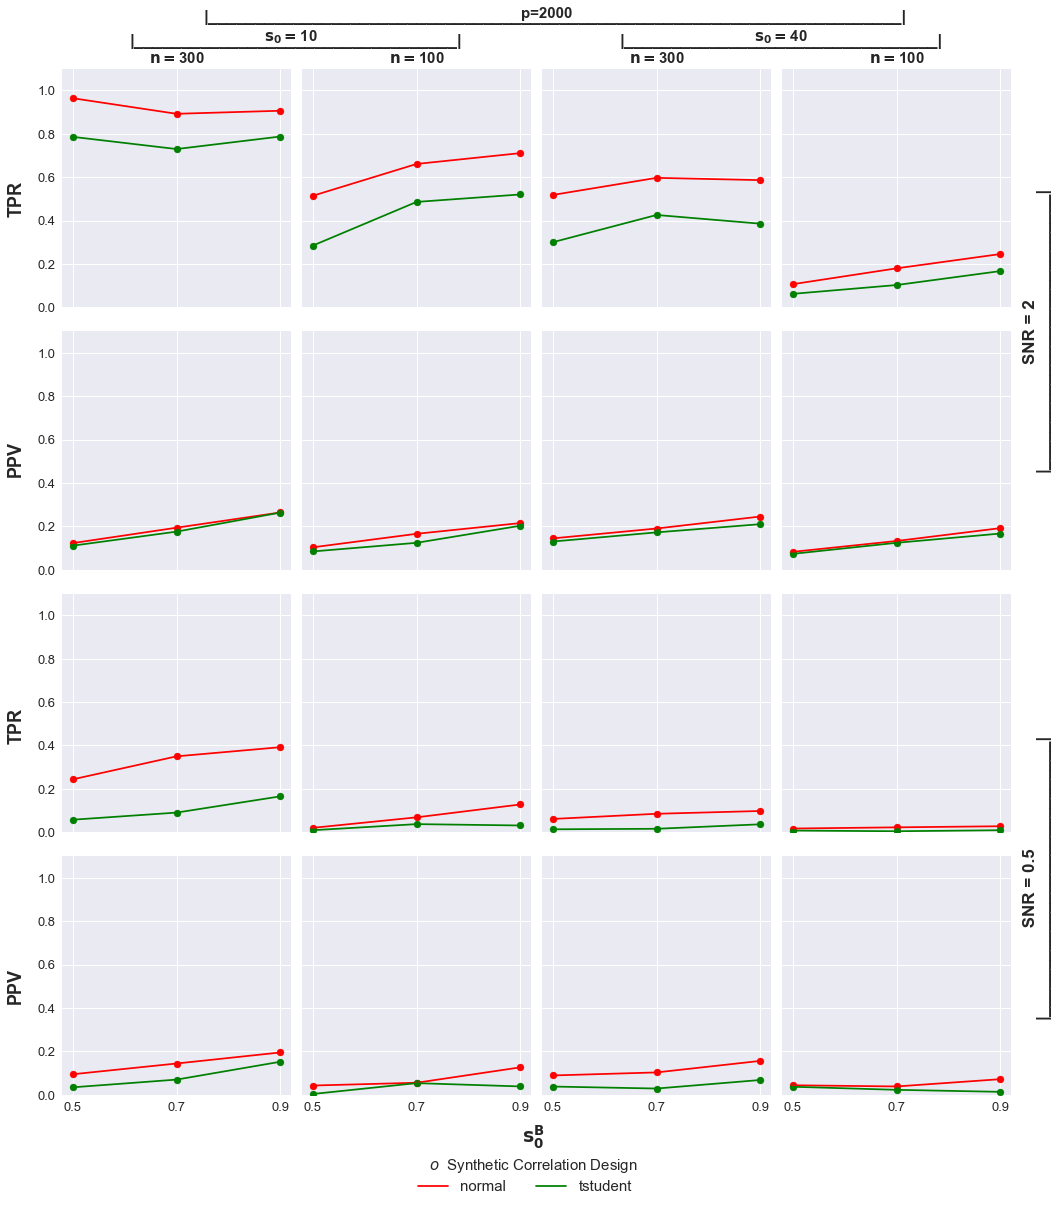

In [39]:
fig,ax = plt.subplots(4,4,sharex=True, sharey=True,figsize = (17,19 ))
#score = "RMSE"
for n,s0,SNR,i,j,score in zip([300,100,300,100,300,100,300,100,300,100,300,100,300,100,300,100],
                        [10,10,40,40,10,10,40,40,10,10,40,40,10,10,40,40],
                        [2,2,2,2,2,2,2,2,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],
                        [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3],[0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3],
                        ["tpr","tpr","tpr","tpr","ppv","ppv","ppv","ppv","tpr","tpr","tpr","tpr","ppv","ppv","ppv","ppv"]):
    
    part_normal = scenarios_fig_normal[(scenarios_fig_normal["n"]==n) & (scenarios_fig_normal["s0"]==s0) & (scenarios_fig_normal["SNR"] == SNR)]
    part_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent["n"]==n) & (scenarios_fig_tstudent["s0"]==s0) & (scenarios_fig_tstudent["SNR"] == SNR)]
    part_dict = {"tstudent":part_tstudent, "normal": part_normal}
    ##ordenando
    for dado,cor in zip(["normal","tstudent"],["red","green"]):
        part  = part_dict[dado]
        ordenado = sorted(part["s0B"])
        ordem  = np.zeros(3)
            ##### finding the sub_index of the most correlated
        for k in range(3):
            ordem[k] = np.where(part["s0B"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["%s_Lasso"%(score) ]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].plot(np.arange(3),score_ord, color = cor,label = dado)
        ax[i,j].scatter(np.arange(3),score_ord, color = cor)
        
    ax[i,j].tick_params(labelsize=13)
    ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks([0,1,2]) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels([0.5,0.7,0.9]) # change the ticks' names to x
    #ax[i,j].set_title('s0B = %d'%s0B,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(2.55, -3.6), ncol=4,fontsize = 15)
ax[0,0].set_title('$\mathbf{n= }$300',fontweight="bold", size=15)
ax[0,1].set_title('$\mathbf{n= }$100',fontweight="bold", size=15)
ax[0,2].set_title('$\mathbf{n= }$300',fontweight="bold", size=15)
ax[0,3].set_title('$\mathbf{n= }$100',fontweight="bold", size=15)

fig.text(0.51, 0.115, '$\mathbf{s_0^B }$', ha='center', fontweight="bold", size=19)

fig.text(0.08, 0.805, 'TPR', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.08, 0.615, 'PPV', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.08, 0.42, 'TPR', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.08, 0.23, 'PPV', va='center', rotation='vertical', fontweight="bold", size=18 )

fig.text(0.51, 0.095, '$\u03BF$  Synthetic Correlation Design', ha='center', size=15)

fig.text(0.29, 0.923, '$\mathbf{s_0 =}$10', va='center', fontweight="bold", size=15 )
fig.text(0.18, 0.9205, '|__________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.69, 0.923, '$\mathbf{s_0 =}$40', va='center', fontweight="bold", size=15 )
fig.text(0.58, 0.9205, '|_________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.71, 'SNR = 2 ', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.71, '|_____________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.30, ' SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.31, '|_____________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

fig.text(0.5, 0.9401, 'p=2000', va='center', fontweight="bold", size=15 )
fig.text(0.24, 0.938, '|_________________________________________________________________________|', va='center', fontweight="bold", size=17 )


plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)

fig.savefig('Fig9-consistencia.png', dpi=fig.dpi)
plt.show()

## fig 4 t-student

In [23]:
scenarios_fig_tstudent_df3 =  total_results_tstudent_df3[total_results_tstudent_df3["corDesign"]=="Pairwise"] 
scenarios_fig_tstudent_df3 = scenarios_fig_tstudent_df3[scenarios_fig_tstudent_df3.SNR == 1]
scenarios_fig_tstudent_df3 = scenarios_fig_tstudent_df3[scenarios_fig_tstudent_df3.n == 200]
#scenarios_fig_tstudent_df3= scenarios_fig_tstudent_df3[(scenarios_fig_tstudent_df3.s0B == 5)]
#scenarios_fig_tstudent_df3= scenarios_fig_tstudent_df3[(scenarios_fig_tstudent_df3.pB == 10)|(scenarios_fig_tstudent_df3.pB == 100)]

#scenarios_fig_tstudent_df3 = scenarios_fig_tstudent_df3[(scenarios_fig_tstudent_df3.p == 1000)|(scenarios_fig_tstudent_df3.s0 == 10)|(scenarios_fig_tstudent_df3.p == 4000)|(scenarios_fig_tstudent_df3.s0 == 40)]

#scenarios_fig_p1.index = range(12)

In [29]:
scenarios_fig_tstudent_df3[scenarios_fig_tstudent_df3.s0B == 10]

,scenario.1,n,p,s0,SNR,corDesign,pB,s0B,mcc_Lasso,ppv_Lasso,tpr_Lasso,rmse_Lasso,pauc_Lasso
scenario,,,,,,,,,,,,,
639,639,200,1000,10,1.0,Pairwise,0.5,10,0.243713,0.183048,0.457813,18.567729,0.723236
640,640,200,1000,10,1.0,Pairwise,0.5,10,0.000000,0.000000,0.000000,0.000000,0.000000
641,641,200,1000,10,1.0,Pairwise,0.5,10,0.389439,0.304431,0.560937,29.881975,0.778982
645,645,200,1000,10,1.0,Pairwise,0.7,10,0.260258,0.181255,0.492188,18.408329,0.722638
646,646,200,1000,10,1.0,Pairwise,0.7,10,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1242,200,500,40,1.0,Pairwise,0.7,10,0.000000,0.000000,0.000000,0.000000,0.000000
1243,1243,200,500,40,1.0,Pairwise,0.7,10,0.000000,0.000000,0.000000,0.000000,0.000000
1244,1244,200,500,40,1.0,Pairwise,0.9,10,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
fig,ax = plt.subplots(2,4,sharex=True, sharey=True,figsize = (18,12 ))
score = "pauc"
for SNR,n,s0,i,j in zip([2,2,2,2,0.5,0.5,0.5,0.5],[300,100,300,100,300,100,300,100],[10,10,40,40,10,10,40,40],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3]):
    part_normal = scenarios_fig_normal[(scenarios_fig_normal["n"]==n) & (scenarios_fig_normal["s0"]==s0) & (scenarios_fig_normal["SNR"] == SNR)]
    part_tstudent = scenarios_fig_tstudent[(scenarios_fig_tstudent["n"]==n) & (scenarios_fig_tstudent["s0"]==s0) & (scenarios_fig_tstudent["SNR"] == SNR)]
    part_dict = {"tstudent":part_tstudent, "normal": part_normal}
##ordenando
    for dado,cor in zip(["normal","tstudent"],["red","green"]):
        
        part  = part_dict[dado]
        ordenado = sorted(part["s0B"])
        ordem  = np.zeros(3)
            ##### finding the sub_index of the most correlated
        for k in range(3):
            ordem[k] = np.where(part["s0B"] == ordenado[k])[0][0] 
            #take the original index of the selected variables
        score_ord= part["%s_Lasso"%(score)]
        score_ord = score_ord.values[ordem.astype(int)]


##tamanho dos index
        ax[i,j].tick_params(labelsize=13)
        ax[i,j].plot(np.arange(3),score_ord, color = cor,label = dado)
        ax[i,j].scatter(np.arange(3),score_ord, color = cor)
        
    ax[i,j].set_ylim([0,1.1])
    ax[i,j].xaxis.set_ticks([0,1,2]) #set the ticks to be a
    ax[i,j].xaxis.set_ticklabels(list(sorted(part["s0B"]))) # change the ticks' names to x
    #ax[i,j].set_title('s0B = %d'%s0B,fontweight="bold", size=17)

ax[0,0].legend( bbox_to_anchor=(2.6, -1.3), ncol=4,fontsize = 15)
ax[0,0].set_title('n = 300',fontweight="bold", size=17)
ax[0,1].set_title('n = 100',fontweight="bold", size=17)
ax[0,2].set_title('n = 300',fontweight="bold", size=17)
ax[0,3].set_title('n = 100',fontweight="bold", size=17)

fig.text(0.51, 0.105, '$\mathbf{s_0^B}$', ha='center', fontweight="bold", size=20)
fig.text(0.51, 0.0765, '$\u03BF$  Semi-synthetic Correlation Design', ha='center', size=15)
fig.text(0.08, 0.5, 'pAUC', va='center', rotation='vertical', fontweight="bold", size=18 )
fig.text(0.495, 0.985, 'p = 2000', va='center', fontweight="bold", size=17 )
fig.text(0.25, 0.98, '|______________________________________________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.29, 0.945, '$\mathbf{s_0 =}$10', va='center', fontweight="bold", size=17 )
fig.text(0.18, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.68, 0.95, '$\mathbf{s_0 =}$40', va='center', fontweight="bold", size=17 )
fig.text(0.58, 0.94, '|___________________________________|', va='center', fontweight="bold", size=17 )
fig.text(0.91, 0.72, 'SNR = 2', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.72, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.91, 0.33, 'SNR = 0.5', va='center', rotation='vertical', fontweight="bold", size=17 )
fig.text(0.92, 0.33, '|__________________________|', va='center', rotation='vertical', fontweight="bold", size=17 )

plt.subplots_adjust(left=0.125,
                    bottom=0.15, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.05, 
                    hspace=0.1)
#fig.savefig('Fig3-consistencia.png', dpi=fig.dpi)

plt.show()